In [1]:
pip install tweepy

In [2]:
import tweepy

In [3]:
#Authentication
CONSUMER_KEY= 'woVUqhu8TN0cpynxiS2UQELm3'
CONSUMER_SECRET ='wQlJTuTg7yACFiyLZj3x6jQRIjBdHI7799Sq69MV89tOHn5ODE'
ACCESS_TOKEN = '2790818165-1ftTRXtOtbDZ5uDO80iANUPpD7WRmu8k7Wn0KZH'
ACCESS_SECRET = 'UKt3fO05LYet34X1yO6UruBOSsQOPxDSrRe1BLS4Dqz3N'

In [4]:
# API's setup:
def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [5]:
#create an extractor object to search for tweets use 'blue plaques' keyword
extractor = twitter_setup()
fetched_tweets = extractor.search('LQHomesMatter', count = 5000)

In [6]:
type(fetched_tweets)

tweepy.models.SearchResults

In [7]:
import re 
import nltk
import os
from nltk.util import ngrams
import multiprocessing

In [8]:
#remove url link at the end of the tweets
def remove_url(tweet):
    head, sep, tail = tweet.partition('http')
    return (head)

In [9]:
#remove the picture link
def remove_piclink(tweet):
    head, sep, tail = tweet.partition('pic.twitter.com')
    return (head)

In [10]:
#remove the special character
def remove_char(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([^ ]+\.[^ ]+')", " ", tweet).split())

In [11]:
#remove number 
def remove_num(tweet):
    return re.sub("\S*\d\S*", "", tweet).strip()

In [12]:
textData=[]
for i in fetched_tweets:
    textData.append(i.text)
textData

['@FinancialTimes We’ve had 50% increase in management fee, 100% increase in emergency lighting servicing (that hadn’… https://t.co/PyPUpboDbR',
 'RT @LucieGutfreund: "Obscene" service charges by @G15London housing associations.\n\nThe tricks and lies that @LQHomesMatter throws behind in…',
 'A big well done &amp; Hat tip to @Se_Railway for enabling such a glorious display of pollinators &amp; wildflowers. If only… https://t.co/ihIqYRFjYT',
 'RT @LucieGutfreund: Emergency lines on Sun were not answered by @LQHomesMatter. For other residents, call backs were promised for days but…',
 'RT @LSEColleges: London South East Colleges and @LQHomesMatter are delighted to announce that our planning application to deliver a brand-n…',
 "@SophieLB1 @LQHomesMatter Oh yes. That's a common excuse as well.",
 'RT @HomeownersLQ: Communal area cleaning costs surged from £193 per flat in 2013 to £1,053 because @LQHomesMatter "remeasured" the building…',
 "RT @iamjustanumber: @LQHomesMatter @LQcontactus \

In [13]:
processed=[]
for i in textData:
    i=remove_url(i)
    i= remove_piclink(i)
    i=remove_char(i)
    i=remove_num(i)
    processed.append(i)

In [14]:
#word cloud visualisation about what people are talking about
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopset = set(stopwords.words('english'))


#remove the stopword and set the wordcloud counted by frequncy 
w2 = WordCloud(width=1000, height=800,stopwords=stopset, max_words=150,collocations=False)
textPlot=textData

w2.generate(" ".join(list(textPlot)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


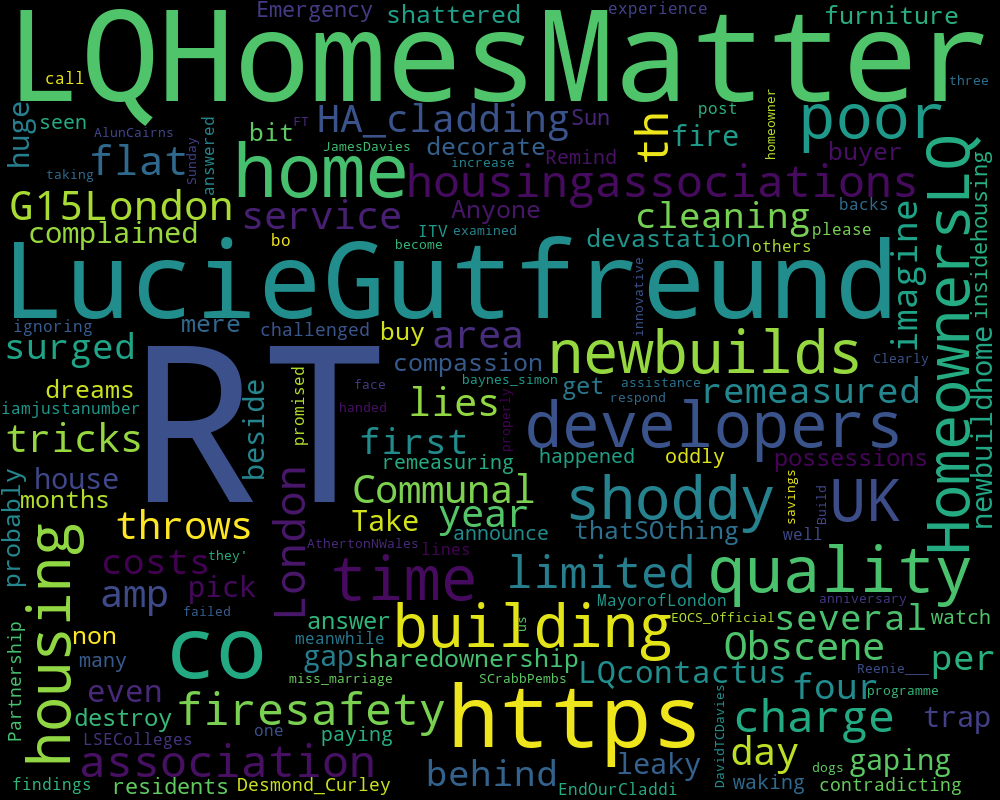

In [15]:
w2.to_image()